In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

Load CO2 Emission data

In [2]:
data_co2 = pd.read_csv("GCB2022v27_MtCO2_flat.csv")

In [3]:
data_co2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
data_co2.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [6]:
data_co2 = data_co2.dropna(subset='Total')

In [7]:
data_co2.fillna(0, inplace=True)

In [8]:
data_co2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data_co2 = data_co2[data_co2['Year'] >= 1950]
data_co2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
200,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.0,0.0,0.0,0.0,0.011266
201,Afghanistan,AFG,1951,0.091600,0.025648,0.065952,0.0,0.0,0.0,0.0,0.012098
202,Afghanistan,AFG,1952,0.091600,0.031708,0.059892,0.0,0.0,0.0,0.0,0.011946
203,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.0,0.0,0.0,0.0,0.013685
204,Afghanistan,AFG,1954,0.106256,0.042502,0.063754,0.0,0.0,0.0,0.0,0.013511


In [10]:
data_co2.sort_values('Year', ascending=False).head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63103,Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699
37535,Morocco,MAR,2021,70.577665,27.844789,36.158632,1.573744,5.000500,0.000000,0.000000,1.903564
37263,Montserrat,MSR,2021,0.020678,0.000000,0.020678,0.000000,0.000000,0.000000,0.000000,4.681398
36991,Montenegro,MNE,2021,1.751386,0.786839,0.964547,0.000000,0.000000,0.000000,0.000000,2.789458
36719,Mongolia,MNG,2021,50.315914,44.400088,5.428566,0.000000,0.487261,0.000000,0.000000,15.029627


The newest data are from 2021, checking what countries had the highest co2 emissions in this year

In [11]:
latest_year = data_co2[data_co2['Year'] == 2021]
top_emitters = latest_year.nlargest(11, 'Total')

top_emitters[['Country', 'Total']]

,Country,Total
63103,Global,37123.850352
10879,China,11472.369171
60111,USA,5007.335889
25567,India,2709.683625
47327,Russia,1755.547390
27743,Japan,1067.398435
62831,International Transport,1021.749204
26655,Iran,748.878752
21487,Germany,674.753566
49503,Saudi Arabia,672.379870


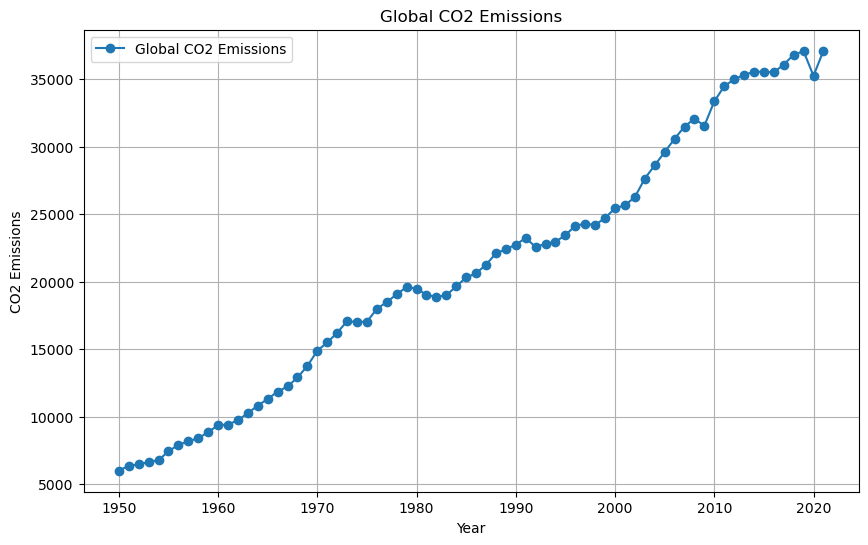

In [12]:
global_co2 = data_co2[data_co2['Country'] == 'Global']

plt.figure(figsize=(10,6))
plt.plot(global_co2['Year'], global_co2['Total'], marker = 'o', label = 'Global CO2 Emissions')
plt.title('Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

In [13]:
global_co2 = data_co2[data_co2['Country'] == 'Global']

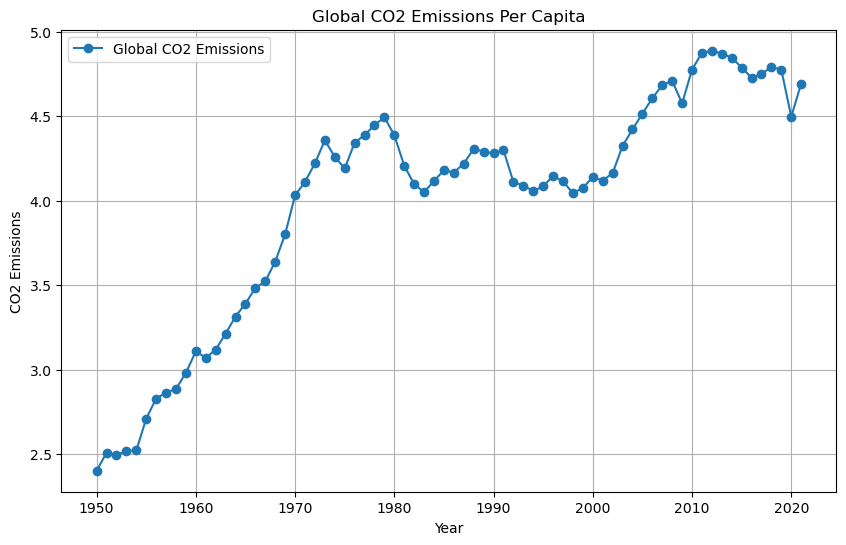

In [14]:
plt.figure(figsize=(10,6))
plt.plot(global_co2['Year'], global_co2['Per Capita'], marker = 'o', label = 'Global CO2 Emissions')
plt.title('Global CO2 Emissions Per Capita')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

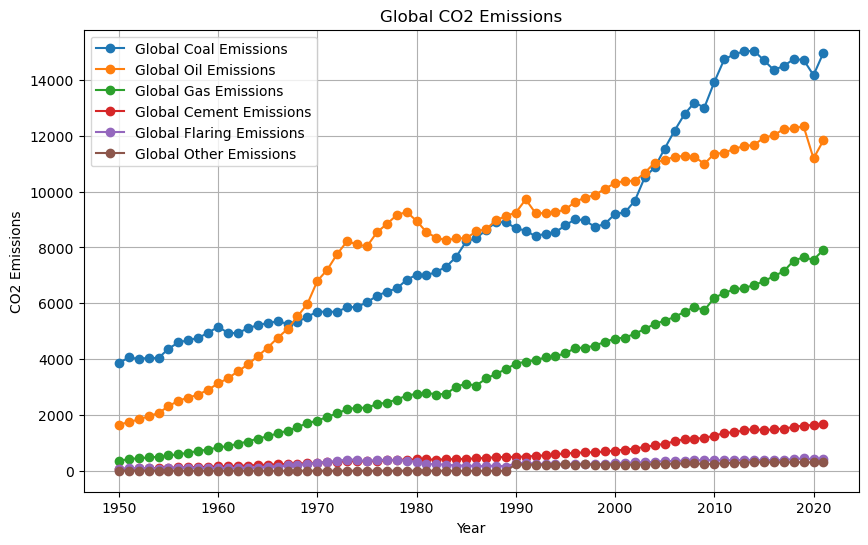

In [15]:
plt.figure(figsize=(10,6))
plt.plot(global_co2['Year'], global_co2['Coal'], marker = 'o', label = 'Global Coal Emissions')
plt.plot(global_co2['Year'], global_co2['Oil'], marker = 'o', label = 'Global Oil Emissions')
plt.plot(global_co2['Year'], global_co2['Gas'], marker = 'o', label = 'Global Gas Emissions')
plt.plot(global_co2['Year'], global_co2['Cement'], marker = 'o', label = 'Global Cement Emissions')
plt.plot(global_co2['Year'], global_co2['Flaring'], marker = 'o', label = 'Global Flaring Emissions')
plt.plot(global_co2['Year'], global_co2['Other'], marker = 'o', label = 'Global Other Emissions')
plt.title('Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

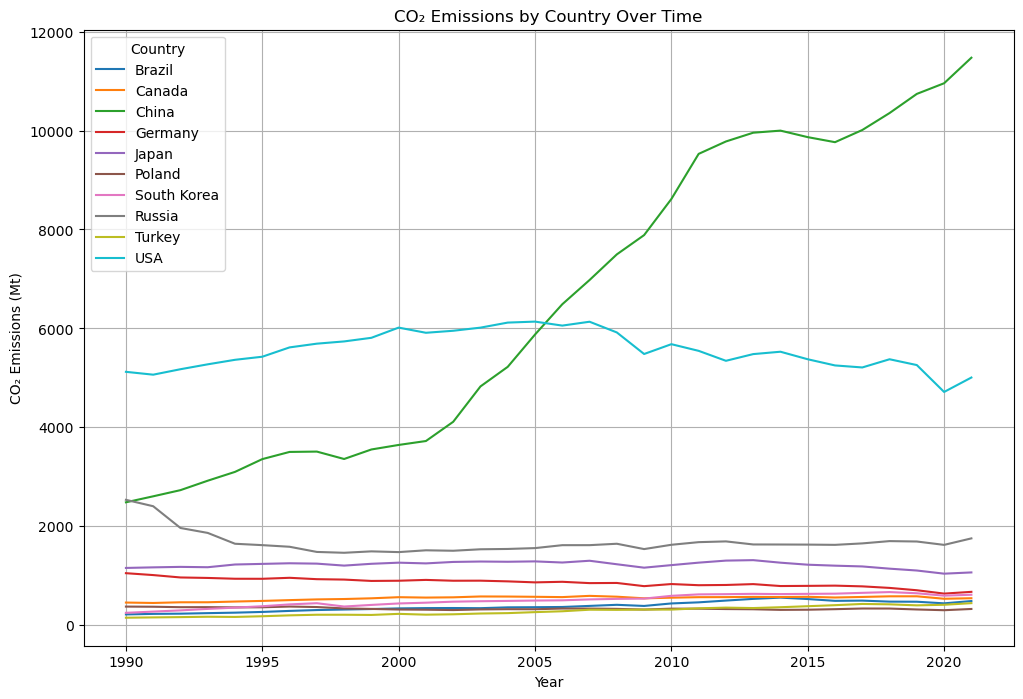

In [16]:
countries = ['China', 'USA', 'Russia', 'Japan', 'Germany', 'South Korea', 'Canada', 'Brazil', 'Turkey', 'Poland']
filtered_data = data_co2[data_co2['Country'].isin(countries)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_data, x=data_co2['Year'][data_co2['Year']>=1990], y='Total', hue='Country')
plt.title('CO₂ Emissions by Country Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Mt)')
plt.legend(title='Country')
plt.grid()
plt.show()

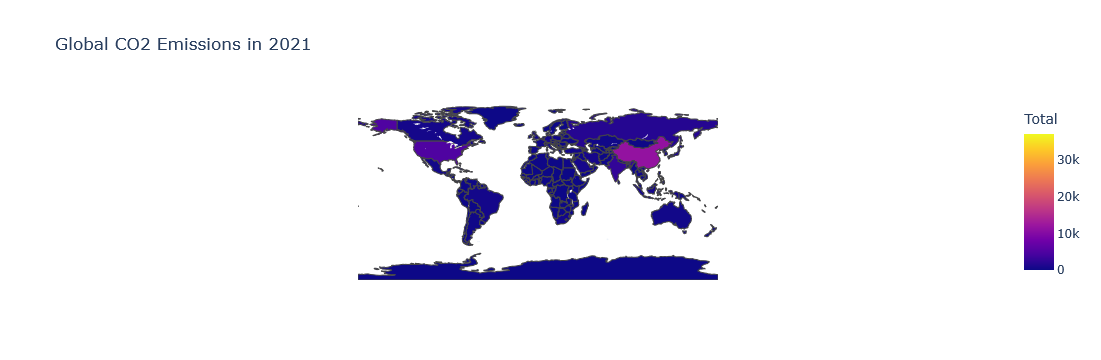

In [19]:
fig = px.choropleth(latest_year,
                    locations="Country",
                    locationmode="country names",
                    color="Total",
                    title="Global CO2 Emissions in 2021",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

Load temperature data

In [20]:
data_temperature = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [21]:
data_temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [22]:
data_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [23]:
data_temperature.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [24]:
data_temperature = data_temperature.dropna()

In [25]:
data_temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [26]:
data_temperature['Year'] = pd.to_datetime(data_temperature['dt']).dt.year

In [27]:
data_temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


Counting average yearly temperature for every country

In [28]:
data_temperature_year = data_temperature.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()

In [29]:
data_temperature_year_global = data_temperature_year.groupby(['Year'])['AverageTemperature'].mean().reset_index()

In [30]:
data_temperature_year_global['Country'] = 'Global'

In [31]:
data_temperature_year_global

,Year,AverageTemperature,Country
0,1743,5.184140,Global
1,1744,9.837898,Global
2,1745,1.387125,Global
3,1750,9.129353,Global
4,1751,9.167388,Global
...,...,...,...
262,2009,19.546385,Global
263,2010,19.629806,Global
264,2011,19.456040,Global
265,2012,19.468744,Global


In [32]:
data_temperature_year = pd.concat([data_temperature_year, data_temperature_year_global])

In [33]:
data_temperature_year

,Year,Country,AverageTemperature
0,1743,Albania,8.620000
1,1743,Andorra,7.556000
2,1743,Austria,2.482000
3,1743,Belarus,0.767000
4,1743,Belgium,7.106000
...,...,...,...
262,2009,Global,19.546385
263,2010,Global,19.629806
264,2011,Global,19.456040
265,2012,Global,19.468744


How is it look like in Poland?

In [34]:
data_temperature_year[data_temperature_year['Country']=='Poland']

,Year,Country,AverageTemperature
36,1743,Poland,3.937000
86,1744,Poland,9.321125
136,1745,Poland,-0.971750
186,1750,Poland,8.344818
236,1751,Poland,8.283625
...,...,...,...
44878,2009,Poland,8.652917
45120,2010,Poland,7.621417
45362,2011,Poland,8.951667
45604,2012,Poland,8.537750


Checking year range

In [35]:
data_temperature_year = data_temperature_year[data_temperature_year['Year'] >= 1950]
data_temperature_year.sort_values('Year', ascending=False).head()

,Year,Country,AverageTemperature
266,2013,Global,19.850897
45766,2013,Guinea,26.686750
45760,2013,Greenland,-15.409750
45761,2013,Grenada,27.612875
45762,2013,Guadeloupe,27.156750


In [36]:
data_temperature_year.sort_values('Year', ascending=True).head()

,Year,Country,AverageTemperature
30427,1950,Afghanistan,13.043500
30582,1950,Niger,26.735333
30583,1950,Nigeria,26.672000
30584,1950,Niue,25.277250
30585,1950,North America,1.870417


where is the highest average yearly temperature

In [37]:
latest_year_temp = data_temperature_year[data_temperature_year['Year'] == 2013]
top_emitters = latest_year_temp.nlargest(15, 'AverageTemperature')

top_emitters[['Country', 'AverageTemperature']]

,Country,AverageTemperature
45732,Djibouti,30.744750
45807,Mali,29.942000
45706,Burkina Faso,29.385500
45901,United Arab Emirates,29.370625
45864,Senegal,29.301500
45828,Niger,29.231375
45810,Mauritania,29.110000
45754,Gambia,28.724375
45849,Qatar,28.573750
45880,Sudan,28.572000


where is the lowest yearly temperature

In [38]:
latest_year_temp = data_temperature_year[data_temperature_year['Year'] == 2013]
last_emitters = latest_year_temp.nsmallest(15, 'AverageTemperature')

last_emitters[['Country', 'AverageTemperature']]

,Country,AverageTemperature
45760,Greenland,-15.409750
45730,Denmark,-14.927250
45882,Svalbard And Jan Mayen,-5.382000
45852,Russia,-2.263125
45711,Canada,-1.640667
45834,Norway,1.735375
45876,South Georgia And The South Sandwich Isla,2.228625
45816,Mongolia,2.807750
45774,Iceland,2.920250
45770,Heard Island And Mcdonald Islands,3.193750


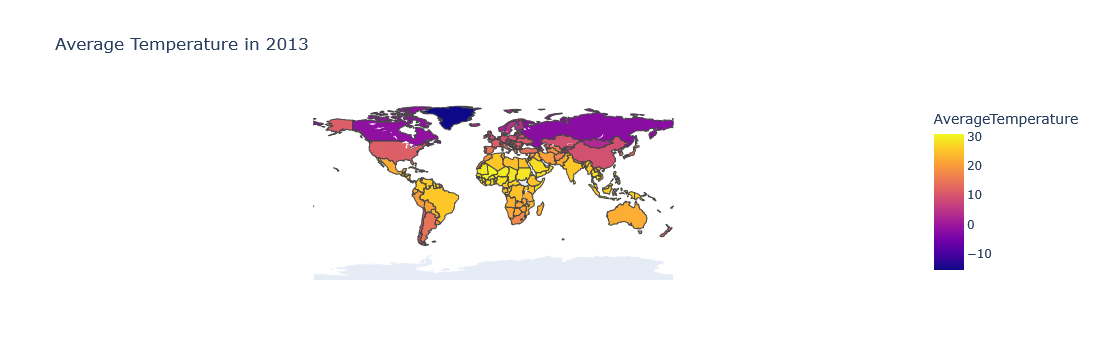

In [39]:
fig = px.choropleth(latest_year_temp,
                    locations="Country",
                    locationmode="country names",
                    color="AverageTemperature",
                    title="Average Temperature in 2013",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

In [40]:
global_temp = data_temperature_year[(data_temperature_year['Country'] == 'Global') & (data_temperature_year['Year'] >= 1950)]
global_temp.head()

,Year,Country,AverageTemperature
203,1950,Global,18.588817
204,1951,Global,18.775119
205,1952,Global,18.805691
206,1953,Global,18.855640
207,1954,Global,18.580321


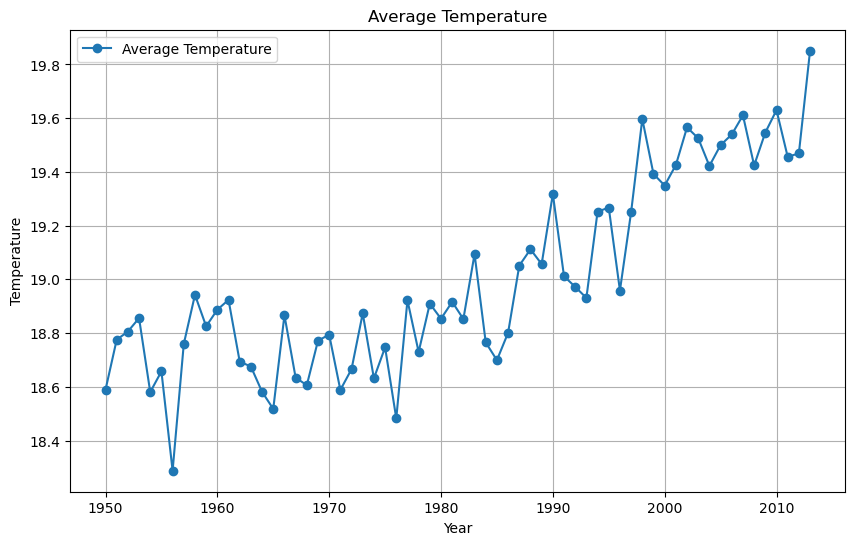

In [41]:
plt.figure(figsize=(10,6))
plt.plot(global_temp['Year'], global_temp['AverageTemperature'], marker = 'o', label = 'Average Temperature')
plt.title('Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

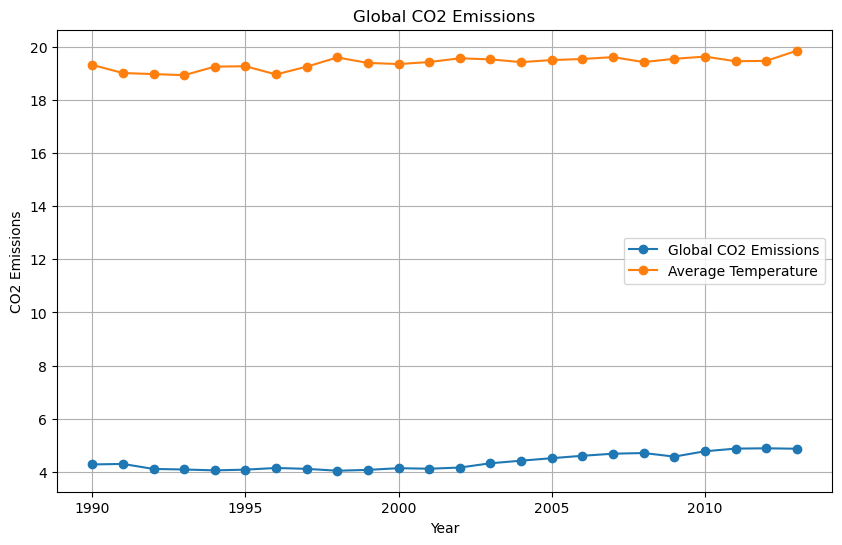

In [42]:
plt.figure(figsize=(10,6))
plt.plot(global_co2['Year'][(global_co2['Year']>=1990) & (global_co2['Year']<=2013)], global_co2['Per Capita'][(global_co2['Year']>=1990) & (global_co2['Year']<=2013)], marker = 'o', label = 'Global CO2 Emissions')
plt.plot(global_temp['Year'][(global_temp['Year']>=1990) & (global_temp['Year']<=2013)], global_temp['AverageTemperature'][(global_temp['Year']>=1990) & (global_temp['Year']<=2013)], marker = 'o', label = 'Average Temperature')
plt.title('Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

In [43]:
global_temp.head()

,Year,Country,AverageTemperature
203,1950,Global,18.588817
204,1951,Global,18.775119
205,1952,Global,18.805691
206,1953,Global,18.855640
207,1954,Global,18.580321


In [44]:
global_co2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63032,Global,WLD,1950,6003.271922,3856.215025,1648.309543,353.156200,66.978938,73.624416,0.0,2.401960
63033,Global,WLD,1951,6379.796307,4060.039800,1742.354432,416.186336,75.839229,79.875260,0.0,2.508639
63034,Global,WLD,1952,6465.726953,4009.059071,1838.023921,447.085044,80.840562,85.363804,0.0,2.496159
63035,Global,WLD,1953,6647.763209,4043.705068,1952.100332,474.527427,89.627553,81.348030,0.0,2.517826
63036,Global,WLD,1954,6789.968651,4039.512096,2068.542651,501.349623,97.230969,77.612011,0.0,2.522296


In [45]:
merge_table = pd.merge(global_temp, global_co2, on='Year', how='outer')
merge_table = merge_table[['Year', 'AverageTemperature', 'Total', 'Per Capita']]

In [46]:
merge_table = merge_table.dropna()

In [47]:
merge_table.head()

,Year,AverageTemperature,Total,Per Capita
0,1950,18.588817,6003.271922,2.401960
1,1951,18.775119,6379.796307,2.508639
2,1952,18.805691,6465.726953,2.496159
3,1953,18.855640,6647.763209,2.517826
4,1954,18.580321,6789.968651,2.522296


In [48]:
merge_table['Total'].corr(merge_table['AverageTemperature'])

0.8399881068466613

In [49]:
merge_table['Per Capita'].corr(merge_table['AverageTemperature'])

0.5982991696907528

In [50]:
merge_table.corr()

,Year,AverageTemperature,Total,Per Capita
Year,1.000000,0.854126,0.990508,0.866789
AverageTemperature,0.854126,1.000000,0.839988,0.598299
Total,0.990508,0.839988,1.000000,0.897160
Per Capita,0.866789,0.598299,0.897160,1.000000


In [51]:
merge_table.describe()

,Year,AverageTemperature,Total,Per Capita
count,64.000000,64.000000,64.000000,64.000000
mean,1981.500000,19.000585,19111.901385,3.909998
std,18.618987,0.359586,8267.595873,0.678640
min,1950.000000,18.287587,6003.271922,2.401960
25%,1965.750000,18.742376,11729.599503,3.460633
50%,1981.500000,18.912840,19289.227878,4.118565
75%,1997.250000,19.325565,24235.591142,4.329323
max,2013.000000,19.850897,35319.201624,4.887984


Checking correlations in data - Total CO2 emissions and average temperature have the highest correlation (0,84)

In [52]:
data_years = np.array(range(2014, 2125))
predicted_values = pd.DataFrame(data_years, columns=['Year'])

In [53]:
def predict_co2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Mean squared error (MSE): {mse:.2f}")
    print(f"Coefficient of determination (R^2): {r2:.2f}")

    merge_table['PredictedCO2'] = model.predict(X)
    
    predicted_values['Total'] = model.predict(predicted_values['Year'].to_numpy().reshape(-1, 1))

In [55]:
def predict_temp(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Mean squared error (MSE): {mse:.2f}")
    print(f"Coefficient of determination (R^2): {r2:.2f}")

    merge_table['PredictedTemp'] = model.predict(X)

    predicted_values['PredictedTemp'] = model.predict(predicted_values[['Year', 'Total']])

In [56]:
predict_co2(merge_table[['Year']], merge_table['Total'])

Mean squared error (MSE): 1311030.90
Coefficient of determination (R^2): 0.99


In [57]:
predict_temp(merge_table[['Year', 'Total']], merge_table['AverageTemperature'])

Mean squared error (MSE): 0.02
Coefficient of determination (R^2): 0.83


In [58]:
merge_table.head()

,Year,AverageTemperature,Total,Per Capita,PredictedCO2,PredictedTemp
0,1950,18.588817,6003.271922,2.401960,5374.215984,18.454989
1,1951,18.775119,6379.796307,2.508639,5810.108603,18.472250
2,1952,18.805691,6465.726953,2.496159,6246.001222,18.492052
3,1953,18.855640,6647.763209,2.517826,6681.893841,18.511014
4,1954,18.580321,6789.968651,2.522296,7117.786460,18.530325


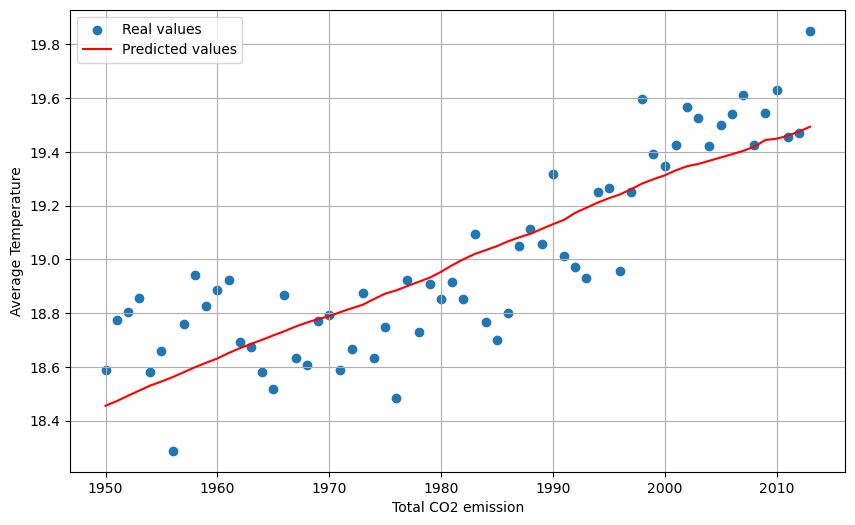

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(merge_table['Year'], merge_table['AverageTemperature'], label='Real values')
plt.plot(merge_table['Year'], merge_table['PredictedTemp'], color='red', label='Predicted values')
plt.xlabel('Total CO2 emission')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid()
plt.show()

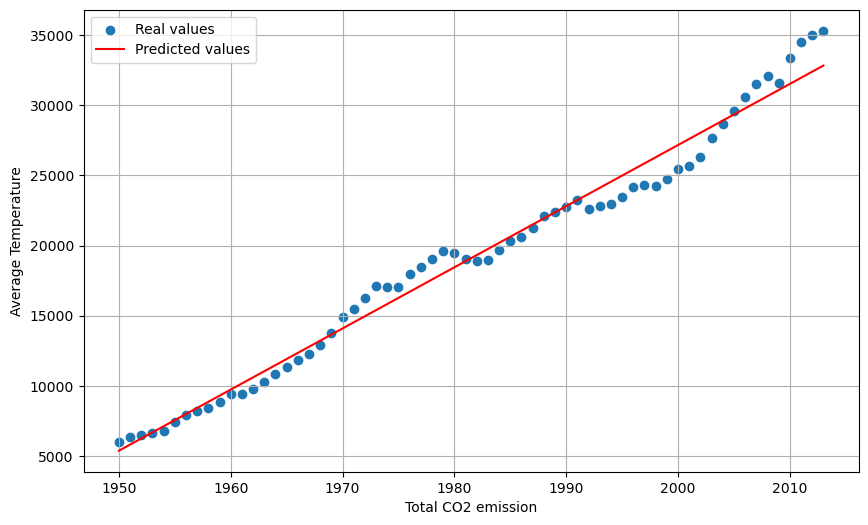

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(merge_table['Year'], merge_table['Total'], label='Real values')
plt.plot(merge_table['Year'], merge_table['PredictedCO2'], color='red', label='Predicted values')
plt.xlabel('Total CO2 emission')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid()
plt.show()

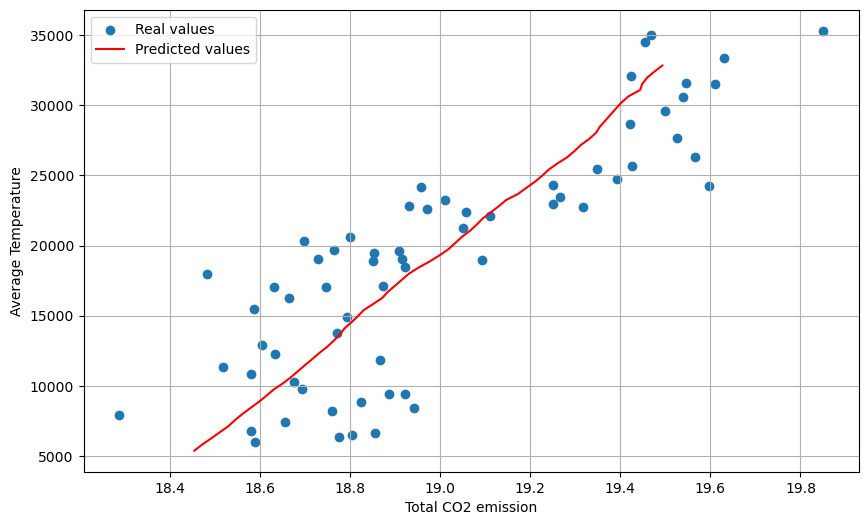

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(merge_table['AverageTemperature'], merge_table['Total'], label='Real values')
plt.plot(merge_table['PredictedTemp'], merge_table['PredictedCO2'], color='red', label='Predicted values')
plt.xlabel('Total CO2 emission')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid()
plt.show()

In [62]:
predicted_values

,Year,Total,PredictedTemp
0,2014,33271.343607,19.531913
1,2015,33707.236227,19.548654
2,2016,34143.128846,19.565395
3,2017,34579.021465,19.582136
4,2018,35014.914084,19.598877
...,...,...,...
106,2120,79475.961234,21.306453
107,2121,79911.853853,21.323194
108,2122,80347.746473,21.339935
109,2123,80783.639092,21.356676


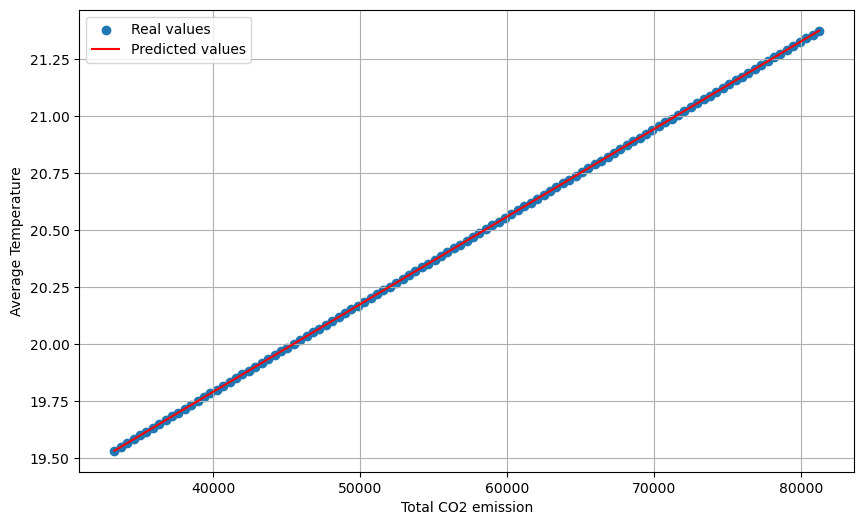

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(predicted_values['Total'], predicted_values['PredictedTemp'], label='Real values')
plt.plot(predicted_values['Total'], predicted_values['PredictedTemp'], color='red', label='Predicted values')
plt.xlabel('Total CO2 emission')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid()
plt.show()

In [65]:
merge_table

,Year,AverageTemperature,Total,Per Capita,PredictedCO2,PredictedTemp
0,1950,18.588817,6003.271922,2.401960,5374.215984,18.454989
1,1951,18.775119,6379.796307,2.508639,5810.108603,18.472250
2,1952,18.805691,6465.726953,2.496159,6246.001222,18.492052
3,1953,18.855640,6647.763209,2.517826,6681.893841,18.511014
4,1954,18.580321,6789.968651,2.522296,7117.786460,18.530325
...,...,...,...,...,...,...
59,2009,19.546385,31564.030692,4.575621,31091.880512,19.444078
60,2010,19.629806,33364.346496,4.776158,31527.773131,19.448881
61,2011,19.456040,34487.011618,4.875781,31963.665750,19.459614
62,2012,19.468744,35006.267581,4.887984,32399.558369,19.475625
